# IMPORTING NECESSARY LIBRARIES

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import plotly.express as px

In [57]:
df = pd.read_csv(r"C:\Users\Sejal Hanmante\Downloads\selected_crops_temp.csv",index_col=0)
df 

,CROP TYPE,SOIL TYPE,REGION,WEATHER,TEMP_MIN,TEMP.MAX,WATER REQUIREMENT
SR NO.,,,,,,,
0,POTATO,DRY,DESERT,NORMAL,10,20,8.500
1,POTATO,DRY,DESERT,SUNNY,10,20,10.000
2,POTATO,DRY,DESERT,WINDY,10,20,9.500
3,POTATO,DRY,DESERT,RAINY,10,20,0.500
4,POTATO,DRY,DESERT,NORMAL,20,30,9.500
...,...,...,...,...,...,...,...
763,ONION,WET,HUMID,RAINY,30,40,0.100
764,ONION,WET,HUMID,NORMAL,40,50,4.625
765,ONION,WET,HUMID,SUNNY,40,50,6.125


In [58]:
df = df.sample(frac = 1)
df

,CROP TYPE,SOIL TYPE,REGION,WEATHER,TEMP_MIN,TEMP.MAX,WATER REQUIREMENT
SR NO.,,,,,,,
614,ONION,DRY,SEMI HUMID,WINDY,20,30,5.375
478,TOMATO,HUMID,SEMI ARID,WINDY,40,50,8.140
624,ONION,DRY,HUMID,NORMAL,10,20,2.750
386,TOMATO,DRY,DESERT,WINDY,10,20,7.120
335,WHEAT,WET,DESERT,RAINY,40,50,1.400
...,...,...,...,...,...,...,...
368,WHEAT,WET,HUMID,NORMAL,10,20,2.480
74,POTATO,HUMID,DESERT,WINDY,30,40,9.700
104,POTATO,HUMID,SEMI HUMID,NORMAL,30,40,6.500


In [59]:
df["SOIL TYPE"].value_counts()

DRY      256
HUMID    256
WET      256
Name: SOIL TYPE, dtype: int64

In [60]:
df

,CROP TYPE,SOIL TYPE,REGION,WEATHER,TEMP_MIN,TEMP.MAX,WATER REQUIREMENT
SR NO.,,,,,,,
614,ONION,DRY,SEMI HUMID,WINDY,20,30,5.375
478,TOMATO,HUMID,SEMI ARID,WINDY,40,50,8.140
624,ONION,DRY,HUMID,NORMAL,10,20,2.750
386,TOMATO,DRY,DESERT,WINDY,10,20,7.120
335,WHEAT,WET,DESERT,RAINY,40,50,1.400
...,...,...,...,...,...,...,...
368,WHEAT,WET,HUMID,NORMAL,10,20,2.480
74,POTATO,HUMID,DESERT,WINDY,30,40,9.700
104,POTATO,HUMID,SEMI HUMID,NORMAL,30,40,6.500


# EXPLORATORY DATA ANALYSIS 

CROP TYPE BY REGION 

In [61]:
region = df.groupby("CROP TYPE")["REGION"].value_counts()
region

CROP TYPE  REGION    
ONION      DESERT        48
           HUMID         48
           SEMI ARID     48
           SEMI HUMID    48
POTATO     DESERT        48
           HUMID         48
           SEMI ARID     48
           SEMI HUMID    48
TOMATO     DESERT        48
           HUMID         48
           SEMI ARID     48
           SEMI HUMID    48
WHEAT      DESERT        48
           HUMID         48
           SEMI ARID     48
           SEMI HUMID    48
Name: REGION, dtype: int64

**Soil Type & WATER REQUIREMENT**

In [62]:
soil = df.groupby("SOIL TYPE")["WATER REQUIREMENT"].median()
soil

SOIL TYPE
DRY      7.125
HUMID    5.630
WET      4.580
Name: WATER REQUIREMENT, dtype: float64

In [63]:
fig1 = px.bar(soil)
fig1.update_layout(title={'text':"Water Requirement of Crops according to the Soil Type"})
fig1.show()

In [64]:
fig1.update_traces(marker_color=['red', 'green', 'blue'])
fig1.update_traces(texttemplate='%{y}', textposition='outside')

**CROP TYPE AND WATER REQUIREMENT**

In [65]:
Crop_water= df.groupby("CROP TYPE")["WATER REQUIREMENT"].median()
Crop_water

CROP TYPE
ONION     4.3125
POTATO    6.5100
TOMATO    5.3800
WHEAT     7.7750
Name: WATER REQUIREMENT, dtype: float64

In [66]:
fig2= px.line(Crop_water,title="Water Requirement of Various Crops",color_discrete_sequence=px.colors.qualitative.Set1)

fig2.update_traces(mode='markers+lines', texttemplate='%{y}', textposition='top center')
fig2.show()

**UNIQUE CROP TYPES IN DATASET**

In [67]:
df["CROP TYPE"].unique()

array(['ONION', 'TOMATO', 'WHEAT', 'POTATO'], dtype=object)

**WATER REQUIREMENT OF CROP ACCORDING TO MIN , MAX TEMP**

In [68]:
df["TEMP_MIN"].min()

10

In [69]:
df["TEMP_MIN"].value_counts()

20    192
40    192
10    192
30    192
Name: TEMP_MIN, dtype: int64

In [70]:
min_temp= df.groupby(["CROP TYPE","TEMP_MIN"])["WATER REQUIREMENT"].mean()
min_temp

CROP TYPE  TEMP_MIN
ONION      10           2.693229
           20           3.451563
           30           4.224479
           40           5.020313
POTATO     10           4.706979
           20           5.502292
           30           6.330625
           40           7.103333
TOMATO     10           3.528750
           20           4.303750
           30          17.569583
           40           5.878750
WHEAT      10           5.706042
           20           6.563125
           30           7.443750
           40           8.307708
Name: WATER REQUIREMENT, dtype: float64

In [71]:
df["TEMP.MAX"].max()

50

In [72]:
df["TEMP.MAX"].value_counts()

30    192
50    192
20    192
40    192
Name: TEMP.MAX, dtype: int64

In [73]:
# for maximum temperature
min_temp= df.groupby(["TEMP.MAX","CROP TYPE"])["WATER REQUIREMENT"].mean()
min_temp

TEMP.MAX  CROP TYPE
20        ONION         2.693229
          POTATO        4.706979
          TOMATO        3.528750
          WHEAT         5.706042
30        ONION         3.451563
          POTATO        5.502292
          TOMATO        4.303750
          WHEAT         6.563125
40        ONION         4.224479
          POTATO        6.330625
          TOMATO       17.569583
          WHEAT         7.443750
50        ONION         5.020313
          POTATO        7.103333
          TOMATO        5.878750
          WHEAT         8.307708
Name: WATER REQUIREMENT, dtype: float64

<Axes: xlabel='TEMP.MAX,CROP TYPE'>

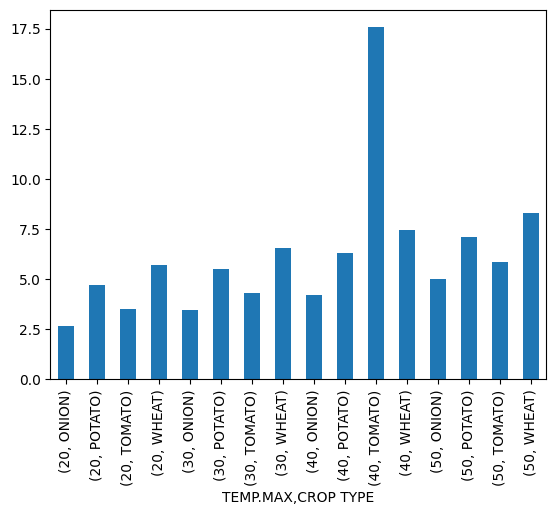

In [74]:
min_temp.plot(kind="bar")

In [75]:
ax = min_temp.unstack(level=0)
fig3=px.bar(ax,title="Water Requirement of Crops according to Variations in Temperature")
fig3.update_traces(texttemplate='%{y}', textposition='outside')
fig3.show()

**WEATHER BASED ON MIN , MAX TEMP**

In [76]:
weather= df.groupby("WEATHER")["TEMP.MAX"].mean()
weather

WEATHER
NORMAL    35.025381
RAINY     34.973545
SUNNY     34.870466
WINDY     35.132275
Name: TEMP.MAX, dtype: float64

In [77]:
df

,CROP TYPE,SOIL TYPE,REGION,WEATHER,TEMP_MIN,TEMP.MAX,WATER REQUIREMENT
SR NO.,,,,,,,
614,ONION,DRY,SEMI HUMID,WINDY,20,30,5.375
478,TOMATO,HUMID,SEMI ARID,WINDY,40,50,8.140
624,ONION,DRY,HUMID,NORMAL,10,20,2.750
386,TOMATO,DRY,DESERT,WINDY,10,20,7.120
335,WHEAT,WET,DESERT,RAINY,40,50,1.400
...,...,...,...,...,...,...,...
368,WHEAT,WET,HUMID,NORMAL,10,20,2.480
74,POTATO,HUMID,DESERT,WINDY,30,40,9.700
104,POTATO,HUMID,SEMI HUMID,NORMAL,30,40,6.500


**CROP TYPE AND SOIL TYPE**

In [78]:
df.groupby('CROP TYPE')["SOIL TYPE"].value_counts()

CROP TYPE  SOIL TYPE
ONION      DRY          64
           HUMID        64
           WET          64
POTATO     DRY          64
           HUMID        64
           WET          64
TOMATO     DRY          64
           HUMID        64
           WET          64
WHEAT      DRY          64
           HUMID        64
           WET          64
Name: SOIL TYPE, dtype: int64

# TRAIN - TEST SPLIT 

In [79]:
df.columns

Index(['CROP TYPE', 'SOIL TYPE', 'REGION', 'WEATHER', 'TEMP_MIN', 'TEMP.MAX',
       'WATER REQUIREMENT'],
      dtype='object')

In [80]:
criteria3 = df["CROP TYPE"]=="POTATO"
potato_df=df.loc[criteria3]


In [81]:
y=df['WATER REQUIREMENT']
X=df.drop('WATER REQUIREMENT',axis=1)

In [82]:
X

,CROP TYPE,SOIL TYPE,REGION,WEATHER,TEMP_MIN,TEMP.MAX
SR NO.,,,,,,
614,ONION,DRY,SEMI HUMID,WINDY,20,30
478,TOMATO,HUMID,SEMI ARID,WINDY,40,50
624,ONION,DRY,HUMID,NORMAL,10,20
386,TOMATO,DRY,DESERT,WINDY,10,20
335,WHEAT,WET,DESERT,RAINY,40,50
...,...,...,...,...,...,...
368,WHEAT,WET,HUMID,NORMAL,10,20
74,POTATO,HUMID,DESERT,WINDY,30,40
104,POTATO,HUMID,SEMI HUMID,NORMAL,30,40


# One hot Encoding 

In [83]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')


In [84]:
categorical_features = ["CROP TYPE", "SOIL TYPE", "REGION", "WEATHER"]
import pickle
# Initialize OneHotEncoder for each categorical feature
one_hot_encoders = {}
for feature in categorical_features:
    one_hot_encoders[feature] = OneHotEncoder(handle_unknown="ignore", sparse=False)
    one_hot_encoders[feature].fit(df[[feature]])

# Dump encoders to pickle file
pickle.dump(one_hot_encoders, open('one_hot_encoders.pkl', 'wb'))

D:\Anaconda\envs\env1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

D:\Anaconda\envs\env1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

D:\Anaconda\envs\env1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

D:\Anaconda\envs\env1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to 

In [85]:
enc_data=pd.DataFrame(enc.fit_transform(X[["CROP TYPE","SOIL TYPE","REGION","WEATHER"]]).toarray())
enc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
764,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
765,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Encoding using pd.get_dummies()

In [86]:
x = pd.get_dummies(X[["CROP TYPE","SOIL TYPE","REGION","WEATHER"]],columns=["CROP TYPE","SOIL TYPE","REGION","WEATHER"])
x

,CROP TYPE_ONION,CROP TYPE_POTATO,CROP TYPE_TOMATO,CROP TYPE_WHEAT,SOIL TYPE_DRY,SOIL TYPE_HUMID,SOIL TYPE_WET,REGION_DESERT,REGION_HUMID,REGION_SEMI ARID,REGION_SEMI HUMID,WEATHER_NORMAL,WEATHER_RAINY,WEATHER_SUNNY,WEATHER_WINDY
SR NO.,,,,,,,,,,,,,,,
614,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
478,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
624,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
386,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
335,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
74,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
104,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0


In [87]:
import pickle 
pickle.dump(x,open("encoder.pkl","wb"))


In [88]:
final_df = pd.merge(x,X[["TEMP_MIN","TEMP.MAX"]],left_index=True , right_index=True)
final_df

,CROP TYPE_ONION,CROP TYPE_POTATO,CROP TYPE_TOMATO,CROP TYPE_WHEAT,SOIL TYPE_DRY,SOIL TYPE_HUMID,SOIL TYPE_WET,REGION_DESERT,REGION_HUMID,REGION_SEMI ARID,REGION_SEMI HUMID,WEATHER_NORMAL,WEATHER_RAINY,WEATHER_SUNNY,WEATHER_WINDY,TEMP_MIN,TEMP.MAX
SR NO.,,,,,,,,,,,,,,,,,
614,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,20,30
478,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,40,50
624,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,10,20
386,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,10,20
335,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,40,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,10,20
74,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,30,40
104,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,30,40


In [89]:
"""final_df = pd.merge(x, final_df, left_index=True, right_index=True)
final_df"""

'final_df = pd.merge(x, final_df, left_index=True, right_index=True)\nfinal_df'

# Train-Test-Split 

In [90]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(final_df,y,test_size=0.4,random_state=42)

In [91]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((460, 17), (308, 17), (460,), (308,))

# Model Development 

In [92]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300,n_jobs=-1,)
model.fit(X_train,y_train)

model.score(X_train,y_train)*100 , model.score(X_test, y_test)*100



(81.885803939142, -3797.894392907079)

In [93]:
y_preds = model.predict(X_test)
y_preds

array([2.14183333e+00, 1.11236667e+00, 3.44723333e+00, 4.40341667e+00,
       1.15186667e+01, 8.51400000e+00, 4.47166667e-01, 2.92573333e+00,
       8.13705000e+00, 1.32025000e+00, 6.72586667e+00, 2.54106667e+00,
       8.38311667e+00, 5.75366667e-01, 6.48266667e-01, 7.46810000e+00,
       5.05948333e+00, 5.94943333e+00, 8.40753333e+00, 3.35258333e+00,
       4.36034722e+00, 2.01786667e+00, 4.45961667e+00, 1.08852333e+01,
       2.93666667e-01, 2.70050000e+00, 7.97073333e+00, 7.07328333e+00,
       9.82570000e+00, 5.26533333e+00, 1.93493333e+00, 7.23710000e+00,
       8.11620000e+00, 1.02353333e+00, 3.16833333e-01, 5.60000000e-01,
       4.74583333e+00, 5.80000000e-01, 9.17478333e+00, 6.75440000e+00,
       8.10250000e-01, 3.91858333e+00, 5.67870000e+00, 3.42500000e-01,
       5.57633333e-01, 8.24668333e+00, 3.14032083e+00, 2.16333333e-01,
       2.21658167e+01, 6.29093333e+00, 4.43193333e+00, 5.23953500e+01,
       6.79676667e+00, 5.29913333e+00, 8.05646667e+00, 4.92553333e+00,
      

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 


In [95]:
reg = GradientBoostingRegressor(random_state=0,n_estimators=250,learning_rate=1.8)
reg.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1.8, n_estimators=250, random_state=0)

In [96]:
reg.score(X_train,y_train)*100

57.23802959147171

In [97]:
reg.score(X_test,y_test)

-68.35423542353935

In [98]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Neural Network 

In [99]:
#LSTM for regression
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [100]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [101]:
# build the model!
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='tanh')) # (features,)
model.add(Dense(500, activation='tanh'))
model.add(Dense(250, activation='tanh'))
model.add(Dense(125, activation='tanh'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=100,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              18000     
                                                                 
 dense_11 (Dense)            (None, 500)               500500    
                                                                 
 dense_12 (Dense)            (None, 250)               125250    
                                                                 
 dense_13 (Dense)            (None, 125)               31375     
                                                                 
 dense_14 (Dense)            (None, 1)                 126       
                                                                 
Total params: 675,251
Trainable params: 675,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
10/10 [============================

10/10 [==============================] - 0s 28ms/step - loss: 735.1453 - mae: 1.7836 - val_loss: 3.3366 - val_mae: 0.8323
Epoch 54/5000
10/10 [==============================] - 0s 26ms/step - loss: 734.4227 - mae: 1.7381 - val_loss: 2.8450 - val_mae: 0.7569
Epoch 55/5000
10/10 [==============================] - 0s 28ms/step - loss: 747.8526 - mae: 1.8671 - val_loss: 2.4493 - val_mae: 0.6279
Epoch 56/5000
10/10 [==============================] - 0s 41ms/step - loss: 733.2877 - mae: 1.6597 - val_loss: 2.8528 - val_mae: 0.5965
Epoch 57/5000
10/10 [==============================] - 1s 59ms/step - loss: 732.1298 - mae: 1.6295 - val_loss: 3.0383 - val_mae: 0.6247
Epoch 58/5000
10/10 [==============================] - 0s 35ms/step - loss: 731.4343 - mae: 1.6236 - val_loss: 3.1105 - val_mae: 0.7385
Epoch 59/5000
10/10 [==============================] - 0s 26ms/step - loss: 730.6984 - mae: 1.7355 - val_loss: 2.7532 - val_mae: 0.6065
Epoch 60/5000
10/10 [==============================] - 0s 29ms

10/10 [==============================] - 0s 23ms/step - loss: 692.9077 - mae: 1.6632 - val_loss: 6.0411 - val_mae: 0.7812
Epoch 114/5000
10/10 [==============================] - 0s 20ms/step - loss: 691.9070 - mae: 1.5233 - val_loss: 5.1467 - val_mae: 0.8033
Epoch 115/5000
10/10 [==============================] - 0s 19ms/step - loss: 763.7402 - mae: 1.8246 - val_loss: 17.2844 - val_mae: 1.1095
Epoch 116/5000
10/10 [==============================] - 0s 23ms/step - loss: 692.4886 - mae: 1.5619 - val_loss: 8.8175 - val_mae: 0.8089
Epoch 117/5000
10/10 [==============================] - 0s 21ms/step - loss: 690.1701 - mae: 1.4562 - val_loss: 9.6461 - val_mae: 0.8185
Epoch 118/5000
10/10 [==============================] - 0s 24ms/step - loss: 689.3524 - mae: 1.4345 - val_loss: 10.1654 - val_mae: 0.8733
Epoch 119/5000
10/10 [==============================] - 0s 30ms/step - loss: 688.5818 - mae: 1.5198 - val_loss: 11.6527 - val_mae: 0.9949
Epoch 120/5000
10/10 [==============================]

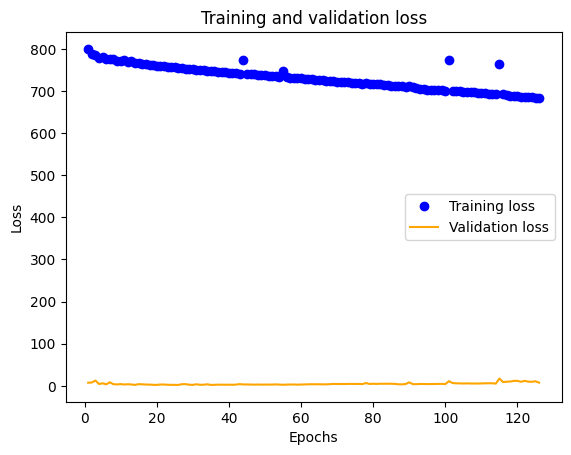

In [102]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

10/10 [==============================] - 0s 13ms/step


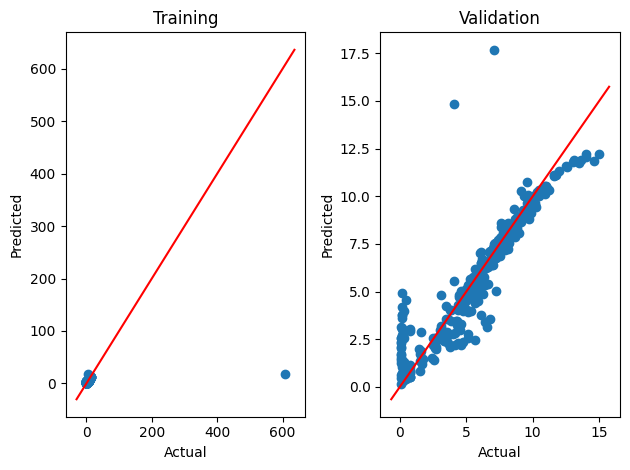

In [103]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [104]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test


15/15 [==============================] - 0s 12ms/step
2.009959468504657
0.8456638048724696


In [105]:
from keras.layers import Dense, Dropout

# Insert the dropout layer
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              18000     
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_17 (Dense)            (None, 250)               125250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                

# LSTM


In [106]:
categorical_features = ['CROP TYPE', 'SOIL TYPE', 'REGION', 'WEATHER']
encoder = OneHotEncoder(sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
data = pd.concat([df.drop(categorical_features, axis=1), encoded_data], axis=1)
data

D:\Anaconda\envs\env1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,TEMP_MIN,TEMP.MAX,WATER REQUIREMENT,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
614,20,30,5.375,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
478,40,50,8.140,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
624,10,20,2.750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
386,10,20,7.120,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
335,40,50,1.400,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,10,20,2.480,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
74,30,40,9.700,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
104,30,40,6.500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
595,10,20,0.200,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
look_back =  30 
sequences = []
def create_sequences(data, look_back):
    for i in range(len(data)-look_back-1):
        seq_in = data.iloc[i:i+look_back, 1:]  # Exclude first column (NO.)
        seq_out = data.iloc[i+look_back, 0]  # Target water requirement
        sequences.append((seq_in, seq_out))
    return sequences

In [108]:
look_back =  30 # Adjust the look-back window as needed
train_size = int(len(data) * 0.8)
train_data, test_data = create_sequences(data.iloc[:train_size], look_back), create_sequences(data.iloc[train_size:], look_back)
train_data[:10], test_data[:10]

([(     TEMP.MAX  WATER REQUIREMENT    0    1    2    3    4    5    6    7    8  \
   614        30              5.375  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
   478        50              8.140  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
   624        20              2.750  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
   386        20              7.120  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
   335        50              1.400  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
   85         30              8.120  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
   454        30              6.680  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
   527        50              0.500  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
   238        50             12.350  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
   358        30              6.060  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
   59         40              0.800  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 

In [109]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, data.shape[1]-1)))  # Adjust units and features as needed
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [110]:
model.fit(X_train, y_train, epochs=100, batch_size=32)  # Adjust epochs and batch size


Epoch 1/100


ValueError: in user code:

    File "D:\Anaconda\envs\env1\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\envs\env1\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\envs\env1\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\envs\env1\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "D:\Anaconda\envs\env1\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Anaconda\envs\env1\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 30, 17), found shape=(None, 17)


# Stratified K fold cross validation

In [ ]:
final_df

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
features = final_df
skf = KFold(n_splits=25)  # Adjust n_splits as needed

for train_index, test_index in skf.split(features, y):
    x_train, x_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Random Forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model using mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")  # Format the output for readability

    

# Lasso regression 


In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LassoCV
reg1= LassoCV(cv=5, random_state=42).fit(X_train, y_train)
reg1.score(X_train,y_train)

In [ ]:
reg1.predict(X_test)

In [ ]:
reg1.score(X_test,y_test)